In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

In [14]:

from astropy.cosmology import Planck18 as cosmo
from astropy import units as u

# Get the Hubble constant in the default units (km/s/Mpc)
H0 = cosmo.H0

# Convert 1/H0 to gigayears
H0_inverse = (1 / H0).to(u.Gyr)

print(f"1/H0 in gigayears: {H0_inverse:.3f}")

1/H0 in gigayears: 14.452 Gyr


In [3]:
def integrand(a, omegam, omegalamb):
    omega0 = omegam + omegalamb
    y = (omegam/a+omegalamb*a**2+(1-omega0))**(-1/2)
    return y
def AgeofUniverse(ScaleFactor, omegam, omegalamb):
    I = quad_vec(integrand,0,ScaleFactor, args=(omegam, omegalamb))
    T = I[0]*H0_inverse # age is in Gyr, 1/H_0 ~ 14.452 Gyr
    return T


In [25]:
OmegamArr = np.arange(1,100)/100
OmegalambArr = np.arange(1,100)/100
FlatOmegalambArr = 1-OmegamArr
OmegamX, OmegalambY = np.meshgrid(OmegamArr, OmegalambArr)
#_, FlatOmegalambY = np.meshgrid(OmegamArr, FlatOmegalambArr)
AgeArr = AgeofUniverse(1, OmegamX, OmegalambY)
FlatAgeArr = AgeofUniverse(1, OmegamArr, FlatOmegalambArr)

# Ωm = 0.31에 가장 가까운 인덱스 찾기
idx_m = np.abs(OmegamArr - 0.31).argmin()
idx_l = np.abs(OmegalambArr - 0.69).argmin()
print(f"Ωm = 0.31, ΩΛ = 0.69일 때의 우주 나이: {AgeArr[idx_l,idx_m]:.3f} Gyr")

Ωm = 0.31, ΩΛ = 0.69일 때의 우주 나이: 13.805 Gyr Gyr


In [65]:
Omegamcur = cosmo.Om0
Omegalambcur = 1-Omegamcur
Agecur = AgeofUniverse(1, Omegamcur, Omegalambcur)

print(f"Omegamcur: {Omegamcur:.3f}")
print(f"Omegalambcur: {Omegalambcur:.3f}")
print(f"Age of Universe: {Agecur:.3f}")

Omegamcur: 0.310
Omegalambcur: 0.690
Age of Universe: 13.810 Gyr


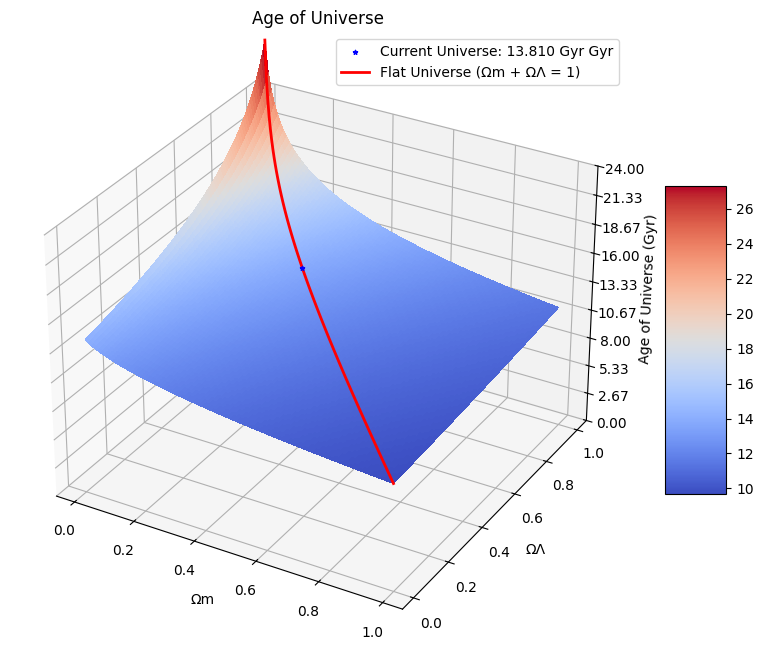

In [73]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d',computed_zorder=False)
ax.scatter(Omegamcur, Omegalambcur, Agecur, c='blue', s=10, marker='*', label=f'Current Universe: {Agecur:.3f} Gyr',zorder=3, depthshade=False)
surf = ax.plot_surface(OmegamX, OmegalambY, AgeArr, 
                      rstride=1, cstride=1, 
                      cmap=cm.coolwarm, 
                      linewidth=0, 
                      antialiased=False, alpha=1)  # alpha 값을 더 낮춰서 투명도 증가
ax.plot3D(OmegamArr, FlatOmegalambArr, FlatAgeArr, 'red', linewidth=2, label='Flat Universe (Ωm + ΩΛ = 1)', zorder=2)


ax.set_xlabel('Ωm')
ax.set_ylabel('ΩΛ')
ax.set_zlabel('Age of Universe (Gyr)')
ax.set_zlim(0, 24)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.legend()
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Age of Universe')
plt.show()

### Calculate Luminosity Distance

In [22]:
def E(z, omegam, omegalamb): # calculate E(z)
    omega0 = omegam + omegalamb
    y = (omegam*(1+z)**3+omegalamb+(1-omega0)*(1+z)**2)**(1/2)
    return y
def R_k(omegam, omegalamb): # calculate curvature scale
     omega0 = omegam + omegalamb
     R_k = 1/np.sqrt(abs(1-omega0))
     return R_k
def Properdist(z, omegam, omegalamb): # return S_k(r)
     omega0 = omegam + omegalamb
     if omega0>0: # closed universe
          r = 
     elif omega<0 #

/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_10144/2471402784.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  R_k = 1/np.sqrt(abs(1-omega0))


inf